## **Computer Vision= VGG16 Model (Transfer learning)**

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from tensorflow import keras

In [2]:
data_path = "/content/drive/MyDrive/dataset"

In [3]:
train_data = "/content/drive/MyDrive/dataset/train"

In [4]:
test_data = "/content/drive/MyDrive/dataset/test"

In [5]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_data,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2424 files belonging to 3 classes.
Using 1940 files for training.


In [6]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_data ,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 606 files belonging to 3 classes.
Using 121 files for validation.


In [7]:
vgg = VGG16(input_shape=(img_height, img_width, 3), weights='imagenet', include_top=False)

58900480/58889256 [==============================] - 1s 0us/step


In [8]:
for layer in vgg.layers:
  layer.trainable = False

In [10]:
x = Flatten()(vgg.output)
prediction = Dense(3, activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)

In [17]:
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [18]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
61/61 [==============================] - 616s 10s/step - loss: 1.4987 - accuracy: 0.8825 - val_loss: 6.2307 - val_accuracy: 0.7355
Epoch 2/10
61/61 [==============================] - 575s 9s/step - loss: 0.0811 - accuracy: 0.9876 - val_loss: 6.8701 - val_accuracy: 0.7025
Epoch 3/10
61/61 [==============================] - 575s 9s/step - loss: 0.0411 - accuracy: 0.9938 - val_loss: 8.6426 - val_accuracy: 0.7025
Epoch 4/10
61/61 [==============================] - 575s 9s/step - loss: 0.0215 - accuracy: 0.9943 - val_loss: 7.0963 - val_accuracy: 0.7438
Epoch 5/10
61/61 [==============================] - 572s 9s/step - loss: 0.0087 - accuracy: 0.9985 - val_loss: 6.3780 - val_accuracy: 0.7521
Epoch 6/10
61/61 [==============================] - 573s 9s/step - loss: 2.6263e-04 - accuracy: 1.0000 - val_loss: 7.2980 - val_accuracy: 0.7438
Epoch 7/10
61/61 [==============================] - 572s 9s/step - loss: 1.5468e-05 - accuracy: 1.0000 - val_loss: 7.2644 - val_accuracy: 0.7438
Epoc

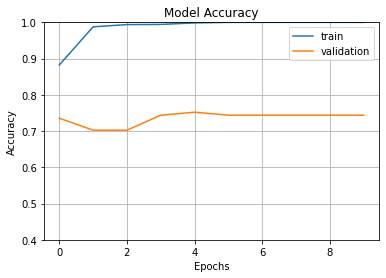

In [19]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [20]:
class_names = train_ds.class_names
print(class_names)

['cat', 'dog', 'rabbit']


In [21]:
def predict_image(img):
  img_4d=img.reshape(-1,180,180,3)
  prediction=model.predict(img_4d)[0]
  return {class_names[i]: float(prediction[i]) for i in range(3)}

In [22]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.1 MB 27.6 MB/s 
     |████████████████████████████████| 84 kB 3.6 MB/s 
     |████████████████████████████████| 53 kB 2.4 MB/s 
     |████████████████████████████████| 212 kB 73.8 MB/s 
     |████████████████████████████████| 2.0 MB 59.6 MB/s 
     |████████████████████████████████| 253 kB 73.4 MB/s 
     |████████████████████████████████| 1.1 MB 56.0 MB/s 
     |████████████████████████████████| 54 kB 3.2 MB/s 
     |████████████████████████████████| 271 kB 60.8 MB/s 
     |████████████████████████████████| 94 kB 4.4 MB/s 
     |████████████████████████████████| 144 kB 63.1 MB/s 
     |████████████████████████████████| 63 kB 1.3 MB/s 
     |████████████████████████████████| 11.1 MB 58.5 MB/s 
     |████████████████████████████████| 80 kB 10.7 MB/s 
     |████████████████████████████████| 43 kB 2.2 MB/s 
     |████████████████████████████████| 4.0

In [23]:
import gradio as gr

In [ ]:
image = gr.inputs.Image(shape=(180,180))
label = gr.outputs.Label(num_top_classes=5)

gr.Interface(fn=predict_image, inputs=image, outputs=label,interpretation='default').launch(debug='True')

/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://17713.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)
